Shape: (299, 13)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30

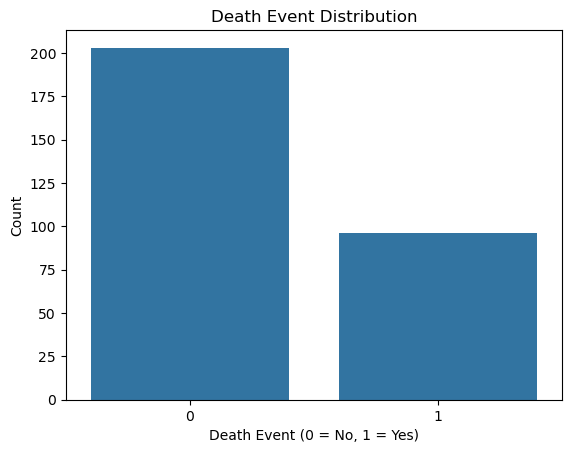

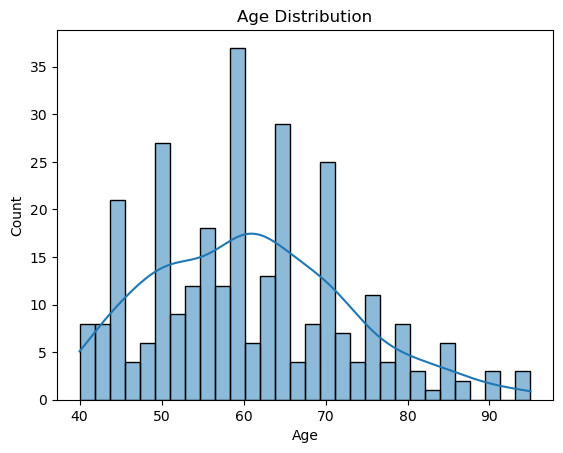

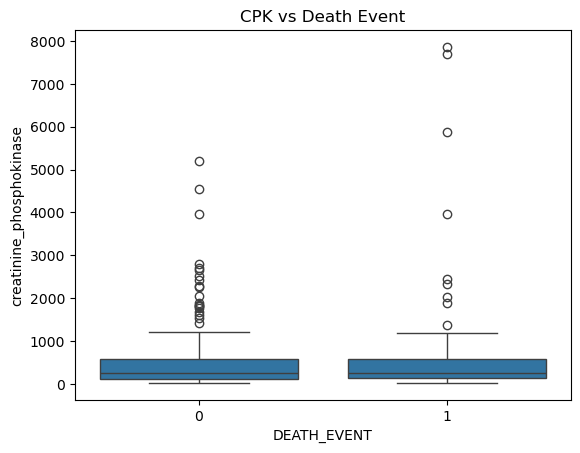

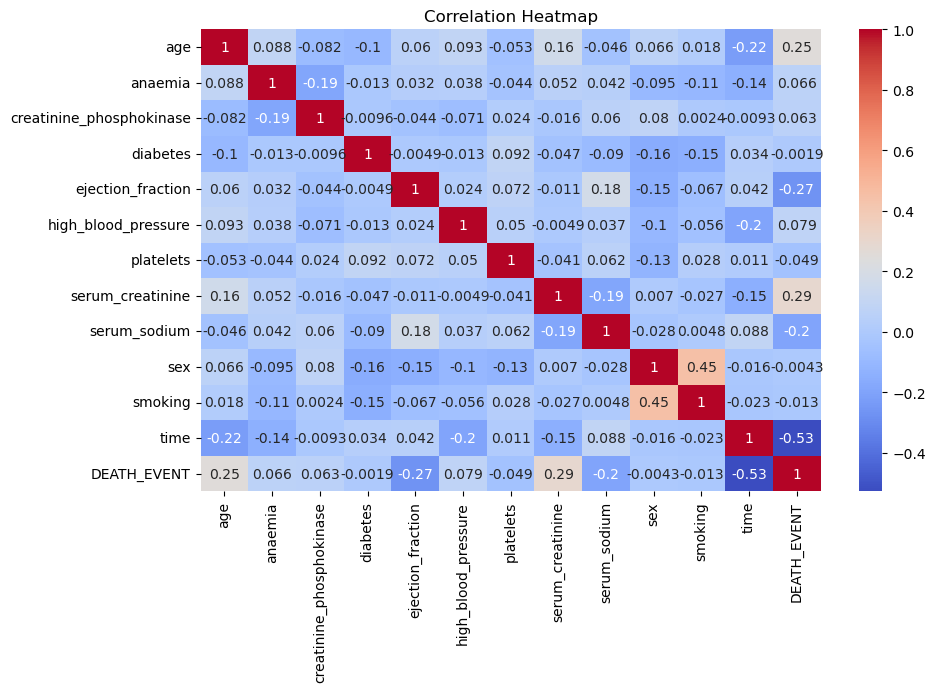


Logistic Regression Results:
Accuracy: 0.8
Confusion Matrix:
 [[34  1]
 [11 14]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.97      0.85        35
           1       0.93      0.56      0.70        25

    accuracy                           0.80        60
   macro avg       0.84      0.77      0.77        60
weighted avg       0.83      0.80      0.79        60

ROC AUC Score: 0.8251428571428572

Random Forest Results:
Accuracy: 0.75
Confusion Matrix:
 [[33  2]
 [13 12]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.94      0.81        35
           1       0.86      0.48      0.62        25

    accuracy                           0.75        60
   macro avg       0.79      0.71      0.72        60
weighted avg       0.78      0.75      0.73        60

ROC AUC Score: 0.8297142857142857


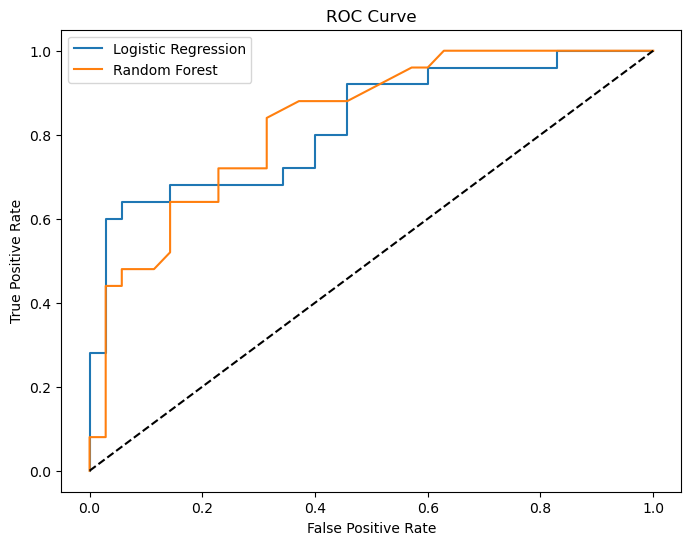

In [8]:
# Heart Failure Mortality Prediction

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

# Step 2: Load Dataset
df = pd.read_csv("Heart_failure_clinical_records_dataset.csv")
df.head()

# Step 3: Data Overview
print("Shape:", df.shape)
print("\nInfo:")
print(df.info())
print("\nStatistical Description:")
print(df.describe())
print("\nTarget Variable Distribution:")
print(df['DEATH_EVENT'].value_counts())

# Step 4: Check for Null Values
print("\nMissing Values:")
print(df.isnull().sum())

# Step 5: Exploratory Data Analysis (EDA)
# Target distribution
sns.countplot(x='DEATH_EVENT', data=df)
plt.title('Death Event Distribution')
plt.xlabel("Death Event (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Age Distribution
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.show()

# Boxplot: CPK vs Death
sns.boxplot(x='DEATH_EVENT', y='creatinine_phosphokinase', data=df)
plt.title("CPK vs Death Event")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Step 6: Feature and Target Split
X = df.drop("DEATH_EVENT", axis=1)
y = df["DEATH_EVENT"]

# Step 7: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 8: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 9: Logistic Regression Model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# Step 10: Evaluation - Logistic Regression
print("\nLogistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))
print("ROC AUC Score:", roc_auc_score(y_test, log_model.predict_proba(X_test)[:, 1]))  # Corrected line

# Step 11: Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Step 12: Evaluation - Random Forest
print("\nRandom Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))  # Corrected line

# Step 13: ROC Curve Plot
fpr_log, tpr_log, _ = roc_curve(y_test, log_model.predict_proba(X_test)[:, 1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label="Logistic Regression")
plt.plot(fpr_rf, tpr_rf, label="Random Forest")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
